In [61]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os

In [64]:
DATA_DIR = '/home/z1079621/storage/embeddings'

vocab = {}
with open(os.path.join(DATA_DIR, 'snli', 'vocab_all.txt')) as f:
    for id, line in enumerate(f):
        word, _ = line.split()
        vocab[int(id)] = word
        
premises = np.load(os.path.join(DATA_DIR, 'dumps', 'attention_premises.npy'))
hypothesis = np.load(os.path.join(DATA_DIR, 'dumps', 'attention_hypothesis.npy'))
attention = np.load(os.path.join(DATA_DIR, 'dumps', 'attention.npy'))

print(premises)
print(hypothesis)

[[[   5 5058   86   63 2674 3465  171    9   11  106   17   57  365  504
     13   11  184    6    2]
  [   5    8  119 4573  153    7 3037  373   33   23  232  952    6    2
      0    0    0    0    0]
  [   5    8   19  508  384 4067 1944    6    2    0    0    0    0    0
      0    0    0    0    0]
  [   5    8   38  474 3816 2271   13    7  801    6    2    0    0    0
      0    0    0    0    0]
  [   5 9420   37    9   11  119   33 2183  409   11  326    6    2    0
      0    0    0    0    0]]]
[[[   5 1760   74    2    0    0]
  [   5   23 3683  671    2    0]
  [   5    8   19   10  154    2]
  [   5    8   38   10  180    2]
  [   5  630   10 3479    6    2]]]


In [76]:
def map_to_words(sent):
    return [vocab.get(word, '?') for word in sent]

for ds in [premises, hypothesis]:
    for batch in ds:
        for sent in batch:
            print(map_to_words(sent))

['<bos>', 'Teens', 'dressed', 'as', 'Native', 'Americans', 'sit', 'in', 'the', 'park', 'with', 'their', 'school', 'bags', 'on', 'the', 'ground', '.', '<eos>']
['<bos>', 'A', 'snow', 'border', 'doing', 'a', 'crazy', 'trick', 'while', 'people', 'watch', 'below', '.', '<eos>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['<bos>', 'A', 'woman', 'works', 'hard', 'forming', 'clay', '.', '<eos>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['<bos>', 'A', 'dog', 'performs', 'acrobatic', 'stunts', 'on', 'a', 'platform', '.', '<eos>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['<bos>', 'Snowboarders', 'sitting', 'in', 'the', 'snow', 'while', 'skiers', 'take', 'the', 'hill', '.', '<eos>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']
['<bos>', 'teens', 'running', '<eos>', '<pad>', '<pad>']
['<bos>', 'people', 'hate', 'tricks', '<eos>', '<pad>']
['<bos>', 'A', 'woman', 'is', 'sleeping', '<eos>']
['<bos>', 'A', 'do

(1, 5, 19, 6)


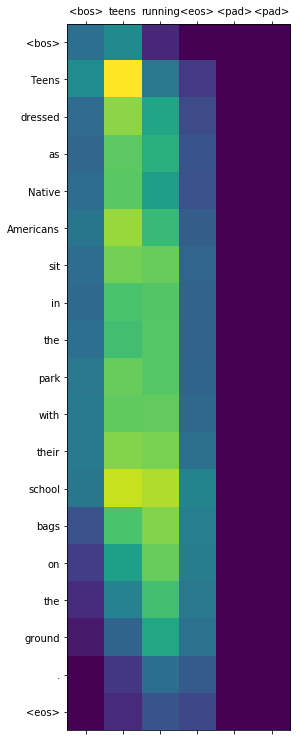

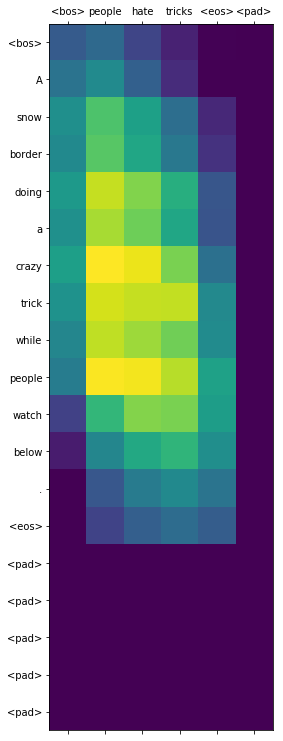

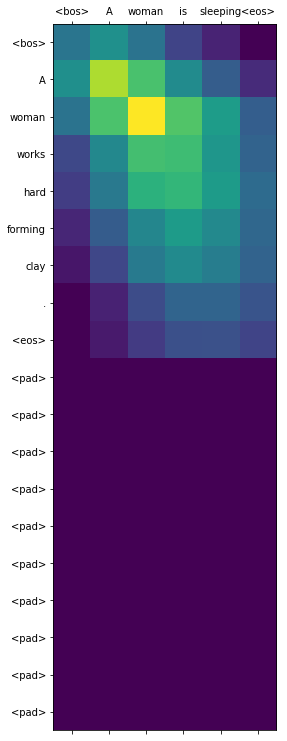

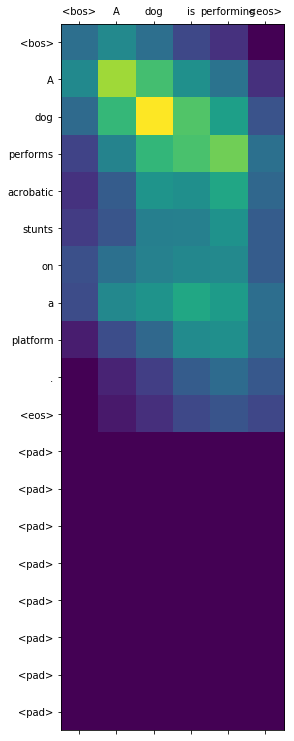

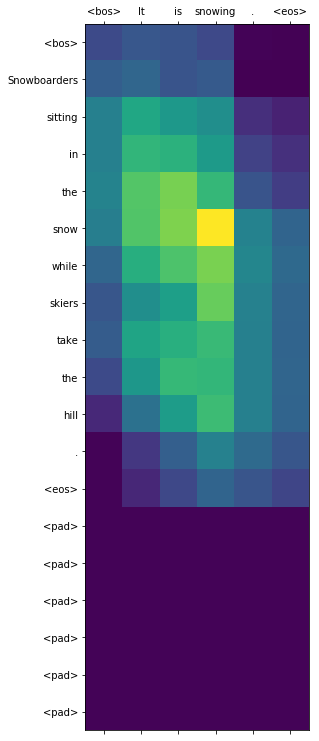

In [83]:
print(attention.shape)

for batch_p, batch_h, batch_att in zip(premises, hypothesis, attention):
    for p, h, matrix in zip(batch_p, batch_h, batch_att):
        plt.matshow(matrix)
        plt.yticks(range(matrix.shape[0]), map_to_words(p))
        plt.xticks(range(matrix.shape[1]), map_to_words(h))
        plt.show()

In [88]:
with h5py.File(os.path.join(DATA_DIR, 'snli', 'dev.h5')) as f:
    print(f['sentence1'][0])
    print(f['sentence1_lemmatized'][0])

[b'Two' b'women' b'are' b'embracing' b'while' b'holding' b'to' b'go'
 b'packages' b'.']
[b'two' b'woman' b'be' b'embrace' b'while' b'hold' b'to' b'go' b'package'
 b'.']


In [91]:
with h5py.File(os.path.join(DATA_DIR, 'embeddings', 'gcc840.h5')) as f:
    words = f['words_flatten'][0].split()

In [101]:
capitalized_words = [w for w in words if w[0].isupper()]
lowercase_words = [w for w in words if w[0].islower()]

In [105]:
only_capitalized_words = []
for w in capitalized_words:
    if w.lower() not in words:
        only_capitalized_words.append(w)
        if len(only_capitalized_words) > 20:
            break
print(only_capitalized_words)

['Hotel_Review', 'RowBox', 'HomeFindercom', 'InManage', 'IncMethod', 'PostReport', 'ViolationRe', 'CompareCompare', 'TURNOVR', 'PODConfigID', 'UsersView', 'QC_AlsoViewedAboveFold', 'ViewPost', 'XMLdblp', 'PMReport', 'CorporationMethod', 'AvailableInOtherSizes', 'RecipeViews', 'Five-Quarter', 'ResizeReturn', 'ItemDisplayTypeID']


## Knowledge

(1, 5, 19)
(1, 5, 19, 6, 5)
train


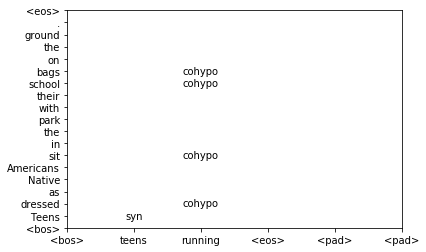

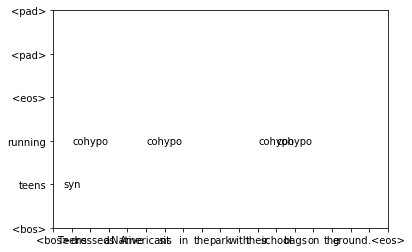

(1, 5, 28)
(1, 5, 28, 15, 5)
dev


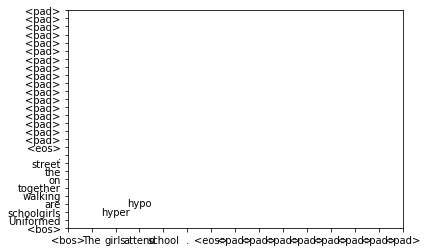

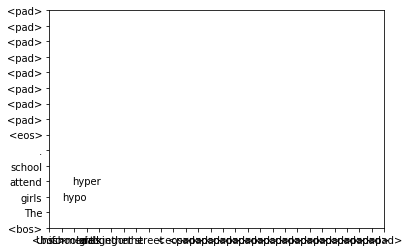

(1, 5, 53)
(1, 5, 53, 17, 5)
test


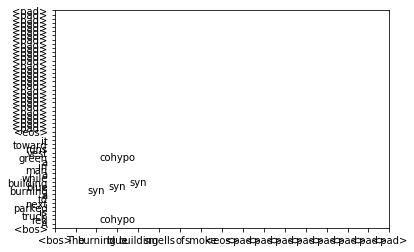

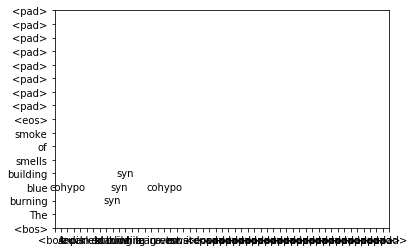

In [170]:
relations = [
    'hyper', 'hypo', 'cohypo', 'ant', 'syn'
]

for stream in ['train', 'dev', 'test']:
    premises = np.load(os.path.join(DATA_DIR, 'dumps', 'knowledge_matrix_%s_premises.npy' % stream))
    hypothesis = np.load(os.path.join(DATA_DIR, 'dumps', 'knowledge_matrix_%s_hypothesis.npy' % stream))
    kbphs = np.load(os.path.join(DATA_DIR, 'dumps', 'knowledge_matrix_%s_kbph.npy' % stream))
    kbhps = np.load(os.path.join(DATA_DIR, 'dumps', 'knowledge_matrix_%s_kbhp.npy' % stream))
    
    print(premises.shape)
    print(kbphs.shape)
    
    print(stream)
    
    for batch_p, batch_h, batch_kbph, batch_kbhp in zip(premises, hypothesis, kbphs, kbhps):
        for p, h, kbph, kbhp in zip(batch_p, batch_h, batch_kbph, batch_kbhp):
#             plt.matshow(np.sum(kbph, axis=-1))
            
            x_idx = np.arange(0, h.shape[0])
            y_idx = np.arange(0, p.shape[0])
            x, y = np.meshgrid(x_idx, y_idx)

            fig, ax = plt.subplots()
            for i, (x_val, y_val) in enumerate(zip(x.flatten(), y.flatten())):
                if np.max(kbph[y_val][x_val]) > 0:
                    c = relations[np.argmax(kbph[y_val][x_val])]
                    ax.text(x_val, y_val, c, va='center', ha='center')            
            plt.yticks(range(kbph.shape[0]), map_to_words(p))
            plt.xticks(range(kbph.shape[1]), map_to_words(h))
            plt.show()
            
            x_idx = np.arange(0, p.shape[0])
            y_idx = np.arange(0, h.shape[0])
            x, y = np.meshgrid(x_idx, y_idx)
            
            fig, ax = plt.subplots()
            for i, (x_val, y_val) in enumerate(zip(x.flatten(), y.flatten())):
                if np.max(kbhp[y_val][x_val]) > 0:
                    c = relations[np.argmax(kbhp[y_val][x_val])]
                    ax.text(x_val, y_val, c, va='center', ha='center')            
            plt.yticks(range(kbhp.shape[0]), map_to_words(h))
            plt.xticks(range(kbhp.shape[1]), map_to_words(p))
            
#             ax.grid()
            plt.show()
            break

In [126]:
import pickle

In [134]:
with open(os.path.join(DATA_DIR, 'pair_features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [148]:
with open(os.path.join(DATA_DIR, 'kim_data', 'pair_features.pkl'), 'rb') as f:
    kim_features = pickle.load(f)

In [150]:
print(len(features))
print(len(kim_features))

84487
84487


In [151]:
with open(os.path.join(DATA_DIR, 'kim_data', 'vocab_cased.pkl'), 'rb') as f:
    vocab_cased = pickle.load(f)

In [153]:
a = 'run'
b = 'bag'

print(features[a][b])
print(kim_features[vocab_cased[a]][vocab_cased[b]])

[0. 0. 1. 0. 0.]


KeyError: 283

In [147]:
vocab_cased['run']

367